# EE386 Digital Signal Processing Lab
## Experiment 2 : Sampling and Aliasing

In [1]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [3]:
#Roll number: 191EE238
alpha = 1 + 238 % 4  
print(alpha)

3


#### Problem 1 : Sampling and frequency domain aliasing

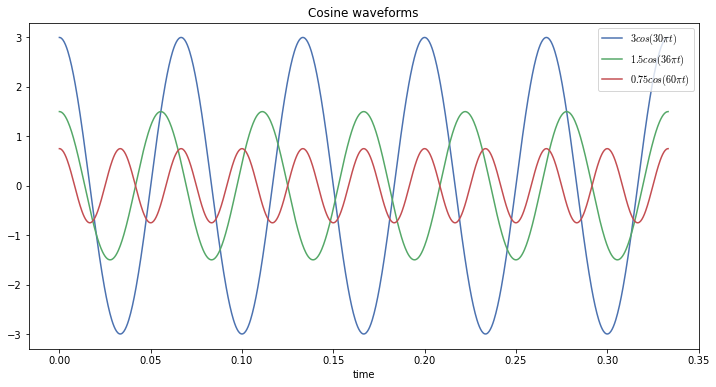

In [4]:
# Question 1
# Plotting signals in 1/3 s
t = np.linspace(0,1/alpha,num = 1001)

def create_cosine_signal(A, freq, t):
    return A * np.cos(2* pi * freq *t)

y1 = create_cosine_signal(alpha  ,5 * alpha,t) #3cos(2pi * 15t)
y2 = create_cosine_signal(alpha/2,6 * alpha,t) #1.5cos(2pi * 18t)
y3 = create_cosine_signal(alpha/4,10* alpha,t) #0.75cos(2pi * 30t)

plt.plot(t,y1,label = '$3cos(30\pi t)$')
plt.plot(t,y2,label = '$1.5cos(36\pi t)$')
plt.plot(t,y3,label = '$0.75cos(60\pi t)$')
plt.title("Cosine waveforms")
plt.legend(loc = 'upper right')
plt.xlabel('time')

plt.savefig('Experiment-2/Results/coswaves.png')

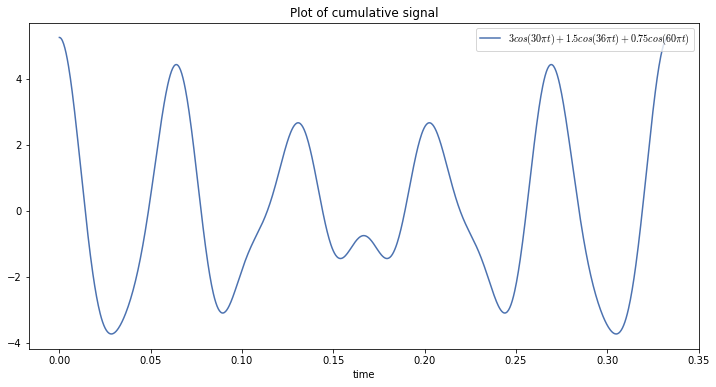

In [5]:
#Question 2 
#Summming all three plots

y = y1 + y2 + y3
plt.plot(t,y,label = '$3cos(30\pi t) + 1.5cos(36\pi t)+ 0.75cos(60\pi t)$')
plt.title('Plot of cumulative signal')
plt.legend(loc = 'upper right')
plt.xlabel('time')

plt.savefig('Experiment-2/Results/cumulative_signal.png')

In [6]:
def sampling(y,Fs):
    T = 1/Fs
    k, n = 0, 0
    N = []
    y_sampled = []
    
    while(n < 1000):
        t_sample = k * T
        n = np.floor(t_sample*alpha*1000)
        N.append(int(n))
        y_sampled.append(y[int(n)])
        k = k + 1
    
    return y_sampled, N

In [7]:
# Question 3
t = np.linspace(0,1/alpha,num = 1001)
Fsa = 14 * alpha      #Fs at 14*alpha
Fsb = 20 * alpha      #Nyquist rate
Fsc = 9 * alpha       #6alpha - n*Fsc = +/- 3alpha, Taking n = 1, Fsc = 9alpha

ya_sampled, Na = sampling(y, Fsa)
yb_sampled, Nb = sampling(y, Fsb)
yc_sampled, Nc = sampling(y, Fsc)

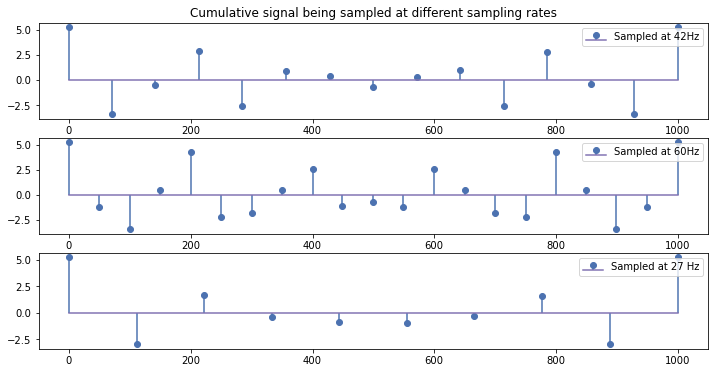

In [8]:

plt.subplot(3,1,1)
plt.title('Cumulative signal being sampled at different sampling rates')
plt.stem(Na, ya_sampled,label = 'Sampled at 42Hz')
plt.legend(loc = 'upper right')
plt.subplot(3,1,2)
plt.stem(Nb, yb_sampled,label = 'Sampled at 60Hz')
plt.legend(loc = 'upper right')
plt.subplot(3,1,3)
plt.stem(Nc, yc_sampled,label = 'Sampled at 27 Hz')
plt.legend(loc = 'upper right')

plt.savefig('Experiment-2/Results/Sampled_cumulative_signal.png')

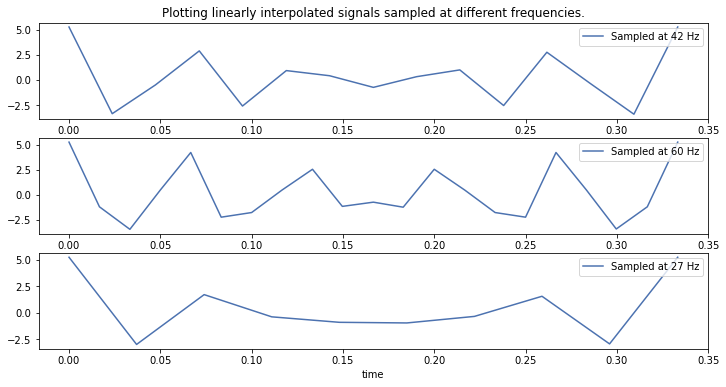

In [9]:
#Question 4: Performing linear interpolation

plt.subplot(3,1,1)
plt.title('Plotting linearly interpolated signals sampled at different frequencies.')
plt.plot(np.divide(Na,alpha*1000),ya_sampled,label = 'Sampled at 42 Hz')
plt.legend(loc = 'upper right')
plt.subplot(3,1,2)
plt.plot(np.divide(Nb,alpha*1000),yb_sampled,label = 'Sampled at 60 Hz')
plt.legend(loc = 'upper right')
plt.subplot(3,1,3)
plt.plot(np.divide(Nc,alpha*1000),yc_sampled,label = 'Sampled at 27 Hz')
plt.legend(loc = 'upper right')
plt.xlabel('time')

plt.savefig('Experiment-2/Results/Linearly_interpolated_signals.png')

In [10]:
def plot_En_dens_spec(x, Fs,Label,max_freq=None, do_fft=True,separate_fig = False):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.square(np.abs(np.fft.fft(x)[0:C])) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.stem(N, X, label = Label)
    if separate_fig == True:
        plt.figure()
    
    return N, X
    

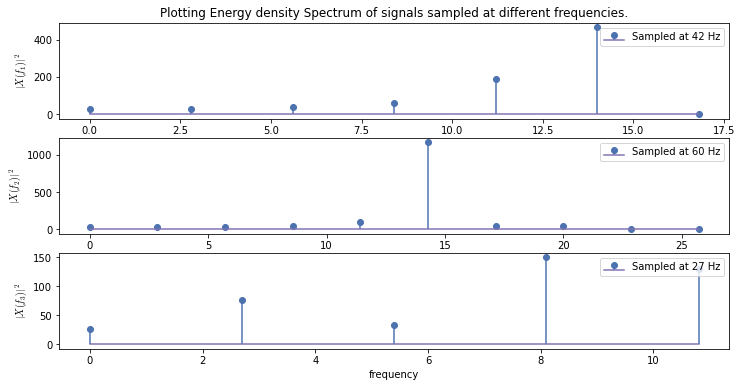

In [11]:
# Question 5: Plotting Energy density spectrum

plt.subplot(3,1,1)
plt.title('Plotting Energy density Spectrum of signals sampled at different frequencies.')

plot_En_dens_spec(ya_sampled,42,Label = 'Sampled at 42 Hz')
plt.ylabel('$|X(f_1)|^2$')
plt.legend(loc = 'upper right')

plt.subplot(3,1,2)
plot_En_dens_spec(yb_sampled,60,Label = 'Sampled at 60 Hz')
plt.ylabel('$|X(f_2)|^2$')
plt.legend(loc = 'upper right')

plt.subplot(3,1,3)
plot_En_dens_spec(yc_sampled,27,Label = 'Sampled at 27 Hz')
plt.legend(loc = 'upper right')
plt.ylabel('$|X(f_3)|^2$')

plt.xlabel("frequency")

plt.savefig('Experiment-2/Results/Energy_density_spectrum.png')


#### Problem 2  : Generating Digital Music

In [12]:
#Frequencies in hertz
C4 = 261.63
D4 = 293.66
E4 = 329.63
F4 = 349.23
G4 = 392.00
A4 = 440.00
B4 = 493.88
C5 = 523.25

C_major_scale = [C4,D4,E4,F4,G4,A4,B4,C5]

In [13]:
def create_notes(f,Fs):

    t = np.arange(0,0.5,1/Fs)
    y = np.sin(np.multiply(2 * pi * f, t))
    
    return y

def create_ascent(Fs):
    track = []
    Do,Re,Mi,Fa,So,La,Ti,octave_Do = (create_notes(C_major_scale[i],Fs) for i in range(8))
    
    track = np.append(Do   , Re, axis = 0)
    track = np.append(track, Mi, axis = 0)
    track = np.append(track, Fa, axis = 0)
    track = np.append(track, So, axis = 0)
    track = np.append(track, La, axis = 0)
    track = np.append(track, Ti, axis = 0)
    track = np.append(track, octave_Do, axis = 0)
    
    return track

In [14]:
Fs = 44100
track = create_ascent(Fs)
IPython.display.Audio(track,rate = Fs)

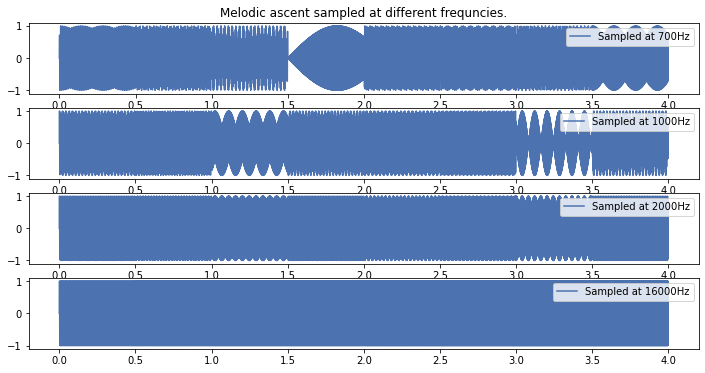

In [15]:
Fs = 700
t1 = np.arange(0,4,1/Fs)
track1 = create_ascent(Fs)
wavfile.write('Experiment-2/Results/C_Scale@700.wav',Fs,(32767*track1).astype(np.int16))

Fs = 1000
t2 = np.arange(0,4,1/Fs)
track2 = create_ascent(Fs)
wavfile.write('Experiment-2/Results/C_Scale@1000.wav',int(Fs),(32767*track2).astype(np.int16))

Fs = 2000
t3 = np.arange(0,4,1/Fs)
track3 = create_ascent(Fs)
wavfile.write('Experiment-2/Results/C_Scale@2000.wav',Fs,(32767*track3).astype(np.int16))

Fs = 16000
t4 = np.arange(0,4,1/Fs)
track4 = create_ascent(Fs)
wavfile.write('Experiment-2/Results/C_Scale@16000.wav',Fs,(32767*track4).astype(np.int16))

plt.subplot(4,1,1)
plt.title('Melodic ascent sampled at different frequncies.')
plt.plot(t1,track1,label = 'Sampled at 700Hz')
plt.legend(loc = 'upper right')
plt.subplot(4,1,2)
plt.plot(t2,track2,label = 'Sampled at 1000Hz')
plt.legend(loc = 'upper right')
plt.subplot(4,1,3)
plt.plot(t3,track3,label = 'Sampled at 2000Hz')
plt.legend(loc = 'upper right')
plt.subplot(4,1,4)
plt.plot(t4,track4,label = 'Sampled at 16000Hz')
plt.legend(loc = 'upper right')

plt.savefig('Experiment-2/Results/C_major_ascent_sampled_at_diff_freqs.png')

#### Problem 3


In [16]:
def resampler(y,new_rate, Fs):
    No_of_samples = (len(y) * new_rate)/Fs
    y_sampled = sp.resample(y,int(No_of_samples))
    
    return y_sampled

In [19]:
Fs, track_1 = wavfile.read('Experiment-2/Track003.wav')
print('Sampling rate: ',Fs)
IPython.display.Audio(track_1,rate = Fs)


Sampling rate:  48000


In [23]:
# Sampling at half the original sampling rate
track_2= resampler(track_1,Fs/2,Fs)

print('Sampling rate: ',Fs/2)
wavfile.write('Experiment-2/Results/Track003@24000.wav',int(Fs/2),(32767*track3).astype(np.int16))
IPython.display.Audio(track_2,rate =Fs/2 )

Sampling rate:  24000.0


In [24]:
#Sampling at one third the original sampling rate
track_3= resampler(track_1,Fs/3,Fs)
t3 = np.linspace(0,17,len(track_3))
print('Sampling rate: ',Fs/3)
wavfile.write('Experiment-2/Results/Track003@16000.wav',int(Fs/3),(32767*track3).astype(np.int16))
IPython.display.Audio(track_3,rate =Fs/3 )

Sampling rate:  16000.0


In [25]:
def plot_spec(x, Fs, max_freq=None,Label = None, do_fft=True):
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    if Label:
        plt.plot(N, X,label = Label)
        plt.legend(loc = 'upper right')
    else:
        plt.plot(N, X)
        
    return N, X

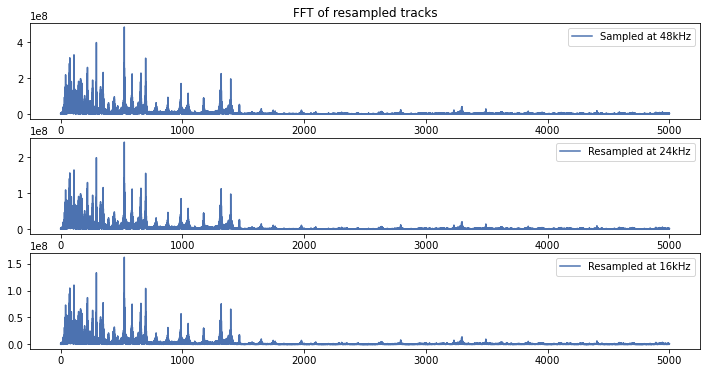

In [26]:

plt.subplot(3,1,1)
plt.title('FFT of resampled tracks')
plot_spec(track_1,48000.0,5000,Label = 'Sampled at 48kHz')

plt.subplot(3,1,2)
plot_spec(track_2,Fs/2,5000,Label = 'Resampled at 24kHz')

plt.subplot(3,1,3)
_,_ = plot_spec(track_3,Fs/3,5000,Label = 'Resampled at 16kHz')


plt.savefig('Experiment-2/Results/Track003@resampled.png')

With the downsampling, the amplitude associated with wave also gets scaled by the factor with which the track was downsampled.

Upsampling refers to adding samples between tracks to increase sampling rate.
One of the method involves adding zero between samples based on multiplication factor. For example, to upsample the sample by two,

In [ ]:
a = np.arange(0,len(track_1),dtype = np.int32)
track_5 = np.insert(track_1,a,0)
wavfile.write('Experiment-2/Results/Track003@96000.wav',2*Fs,(32767*track3).astype(np.int16))
IPython.display.Audio(track_5,rate = Fs*2)


In [ ]:
plt.subplot(2,1,1)
plt.title('FFT of resampled tracks')
plot_spec(track_1,48000.0,5000,Label = 'Sampled at 48kHz')

plt.subplot(2,1,2)
_,_ = plot_spec(track_5,Fs*2.0,5000,Label = 'Resampled at 96kHz')

plt.savefig('Experiment-2/Results/Track003@upsampled.png')